<a href="https://colab.research.google.com/github/Shoukat-Ali123/Machine-Learning-01/blob/main/House_Price_Model_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***This is the Model Prediction of the Price of the House.***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data=pd.read_csv('/content/Housing.csv')

In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
data.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
##convert objects into category
data['mainroad']=data['mainroad'].astype('category')
data['guestroom']=data['guestroom'].astype('category')
data['basement']=data['basement'].astype('category')
data['hotwaterheating']=data['hotwaterheating'].astype('category')
data['airconditioning']=data['airconditioning'].astype('category')
data['prefarea']=data['prefarea'].astype('category')
data['furnishingstatus']=data['furnishingstatus'].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


In [13]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
dataframe01=pd.get_dummies(data)

In [15]:
dataframe01.head(30)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False
5,10850000,7500,3,3,1,2,False,True,True,False,...,True,True,False,False,True,False,True,False,True,False
6,10150000,8580,4,3,4,2,False,True,True,False,...,False,True,False,False,True,False,True,False,True,False
7,10150000,16200,5,3,2,0,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
8,9870000,8100,4,1,2,2,False,True,False,True,...,True,True,False,False,True,False,True,True,False,False
9,9800000,5750,3,2,4,1,False,True,False,True,...,False,True,False,False,True,False,True,False,False,True


In [16]:
dataframe=pd.get_dummies(data, drop_first=True)

In [17]:
dataframe.head(30)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
5,10850000,7500,3,3,1,2,True,False,True,False,True,True,True,False
6,10150000,8580,4,3,4,2,True,False,False,False,True,True,True,False
7,10150000,16200,5,3,2,0,True,False,False,False,False,False,False,True
8,9870000,8100,4,1,2,2,True,True,True,False,True,True,False,False
9,9800000,5750,3,2,4,1,True,True,False,False,True,True,False,True


In [18]:
dataframe.corr()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


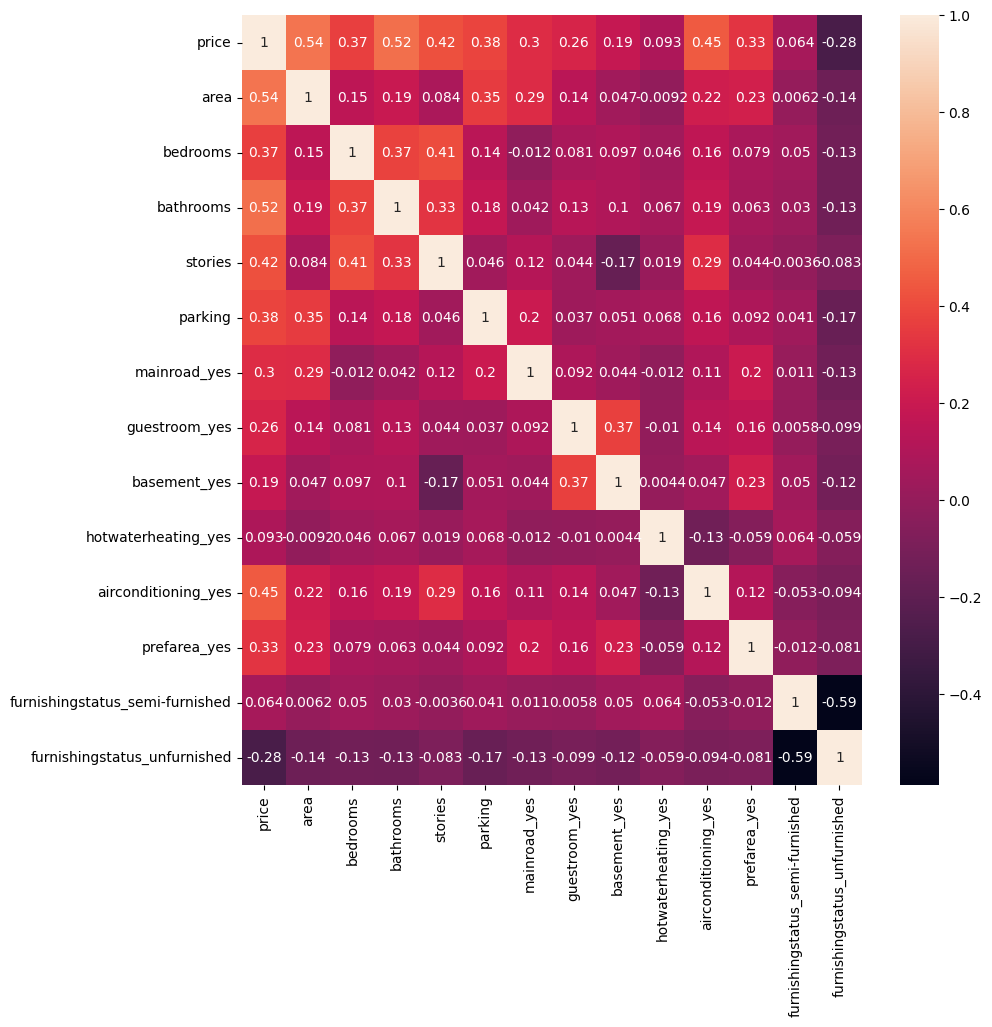

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(dataframe.corr(), annot=True)
plt.show()

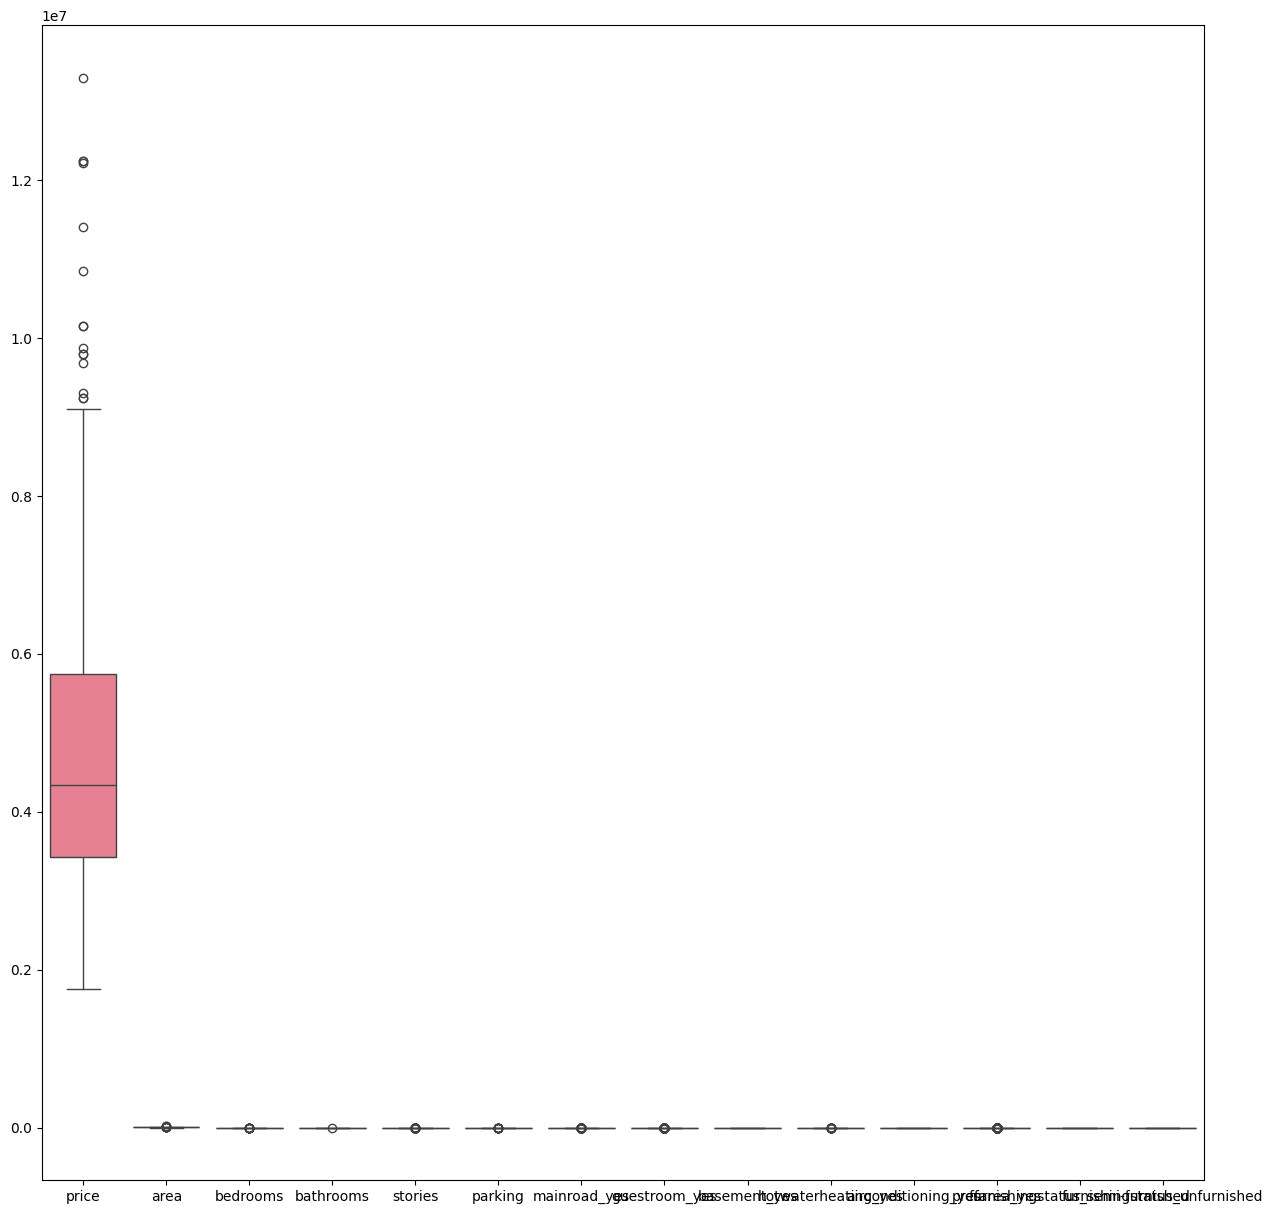

In [20]:
plt.figure(figsize=(15,15))
sns.boxplot(data=dataframe)
plt.savefig('boxplot.png')
plt.show()


**Scaling this in the model as the training data**

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataframe[['area','bedrooms','bathrooms','stories','parking']] =scaler.fit_transform(dataframe[['area','bedrooms','bathrooms','stories','parking']])




In [22]:
dataframe.head(30)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1.517692,True,False,False,False,True,True,False,False
1,12250000,1.757010,1.403419,5.405809,2.532024,2.679409,True,False,False,False,True,False,False,False
2,12250000,2.218232,0.047278,1.421812,0.224410,1.517692,True,False,True,False,False,True,True,False
3,12215000,1.083624,1.403419,1.421812,0.224410,2.679409,True,False,True,False,True,True,False,False
4,11410000,1.046726,1.403419,-0.570187,0.224410,1.517692,True,True,True,False,True,False,False,False
5,10850000,1.083624,0.047278,3.413810,-0.929397,1.517692,True,False,True,False,True,True,True,False
6,10150000,1.581745,1.403419,3.413810,2.532024,1.517692,True,False,False,False,True,True,True,False
7,10150000,5.096263,2.759560,3.413810,0.224410,-0.805741,True,False,False,False,False,False,False,True
8,9870000,1.360358,1.403419,-0.570187,0.224410,1.517692,True,True,True,False,True,True,False,False
9,9800000,0.276484,0.047278,1.421812,2.532024,0.355976,True,True,False,False,True,True,False,True


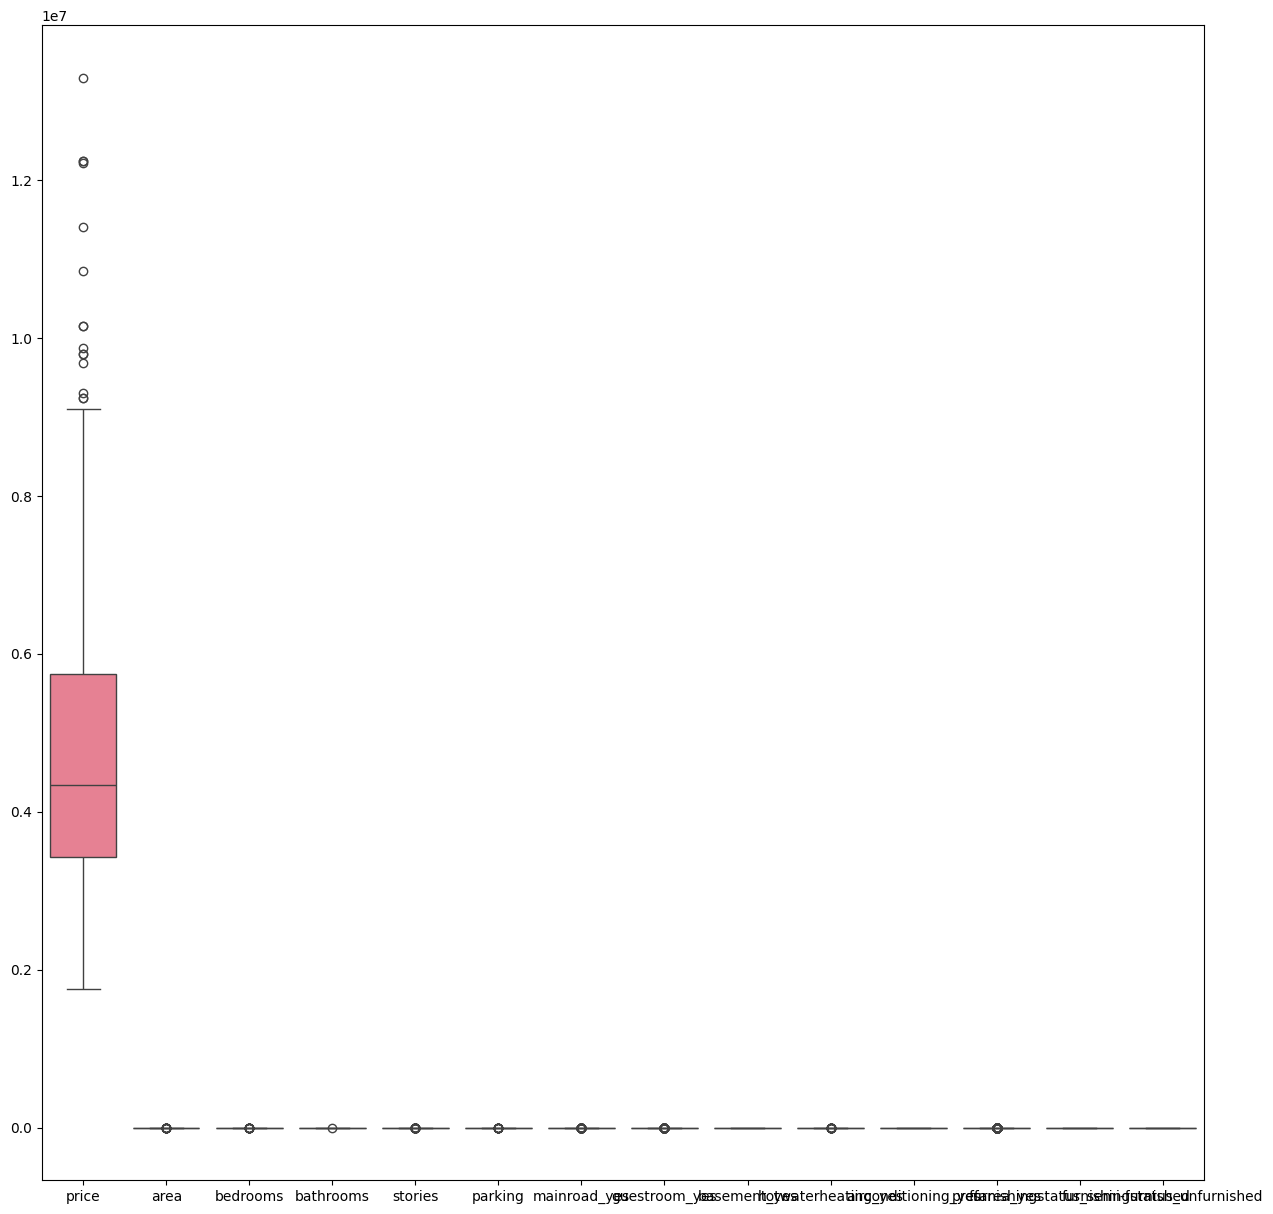

In [23]:
plt.figure(figsize=(15,15))
sns.boxplot(data=dataframe)
plt.savefig('boxplot.png')
plt.show()

**Model Preparation: Train-Test Split**

In [26]:
dataframe.shape

(545, 14)

In [28]:
## Spliting data into train test
## Linear Regression on 80% training and 20% prediction of test data
from sklearn.model_selection import train_test_split
##Split the dataframe into input and target variable
X=dataframe.drop('price', axis=1) ##Input Featurre value
y=dataframe['price'] ##Target Value

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [29]:
x_train

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
152,0.115056,2.759560,-0.570187,0.224410,-0.805741,True,True,True,False,True,True,False,False
456,-1.269535,0.047278,-0.570187,-0.929397,-0.805741,True,False,False,False,False,True,True,False
30,1.072094,0.047278,1.421812,2.532024,1.517692,True,False,False,False,True,False,False,True
467,-0.881185,0.047278,-0.570187,0.224410,1.517692,True,False,False,False,False,False,True,False
498,-1.453102,-1.308863,-0.570187,0.224410,-0.805741,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.640850,0.047278,-0.570187,-0.929397,1.517692,True,True,True,False,False,True,False,False
84,-0.641349,0.047278,-0.570187,0.224410,1.517692,True,False,False,True,False,False,True,False
96,1.775458,0.047278,-0.570187,-0.929397,0.355976,True,False,True,False,False,True,False,False
173,0.068934,1.403419,1.421812,-0.929397,-0.805741,True,False,False,False,True,True,False,True


In [31]:
x_test

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
302,-1.386224,0.047278,-0.570187,1.378217,0.355976,True,False,False,False,False,True,False,True
266,-0.124780,0.047278,-0.570187,-0.929397,1.517692,True,False,False,False,False,True,False,True
159,-0.922695,0.047278,1.421812,-0.929397,-0.805741,True,True,True,False,True,False,False,False
258,-0.512207,0.047278,-0.570187,0.224410,0.355976,True,False,False,False,False,False,True,False
115,1.314236,0.047278,-0.570187,-0.929397,1.517692,True,True,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,-0.908859,-1.308863,1.421812,-0.929397,1.517692,True,False,True,False,False,False,True,False
157,-1.076283,1.403419,1.421812,0.224410,0.355976,False,True,True,False,False,False,False,False
424,-0.945757,0.047278,-0.570187,0.224410,-0.805741,False,False,True,False,False,False,True,False
319,-0.991879,1.403419,-0.570187,1.378217,1.517692,True,False,True,False,True,False,True,False


Model Training

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred=model.predict(x_test)
y_pred

array([4101489.26342856, 4239148.10322114, 5561206.5574739 ,
       3916949.9174789 , 6982227.47967786, 2716123.60867823,
       5708390.73598415, 3194558.5066096 , 4279830.79114619,
       6699131.12766905, 2433705.84135668, 4064882.51867112,
       2975567.20450659, 2578492.95881584, 3134364.07673909,
       5201024.22022999, 2905450.54625914, 4817592.95758354,
       6393062.73192001, 4356712.71865986, 3823538.35682534,
       5522549.77155971, 3318345.03934796, 5865367.22115118,
       2821974.57896012, 5741357.55677583, 6006820.06395417,
       2587515.14877588, 5836179.75986404, 4131069.3845164 ,
       2857165.40754813, 4190207.19036564, 4679620.54604448,
       2734389.64581229, 6698213.72474788, 3760464.11651108,
       2092537.33204854, 3913492.86931399, 3198557.964116  ,
       4848170.56591051, 7194092.90362519, 4695948.81046225,
       3579937.3656375 , 4359484.1577775 , 4093389.42374907,
       6439479.70960998, 6064076.80233967, 3883578.58928368,
       7234373.89947873,

Model Evaluation


In [34]:
mse = mean_squared_error(y_test, y_pred)
mse

704787672561.8761

In [35]:
model.coef_

array([ 549460.06884477,   89569.04135792,  516656.34261514,
        366239.55413846,  249359.19646077,  458254.08916059,
        268823.97576603,  367278.25296967,  976577.59321261,
        923067.78042273,  635435.17185378,    6290.56845747,
       -386937.30344205])

In [36]:
model.intercept_

np.float64(3853244.828182186)